In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
df=pd.read_csv("supermarket_sales.csv")
df.set_index("Invoice ID",inplace=True)
df.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


check columns


In [2]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', ' Tax 5% ', ' Total ', 'Date', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7    Tax 5%                  1000 non-null   float64
 8    Total                   1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

Check null value in this data set 

In [4]:
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
 Tax 5%                    0
 Total                     0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

drop all null value in data set


In [5]:
df.dropna(inplace=True)

In [6]:
df["Product line"].value_counts() # chech how many product sales

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [7]:
totals=df["Quantity"].sum()
print("Total Qantity:",totals)

Total Qantity: 5510


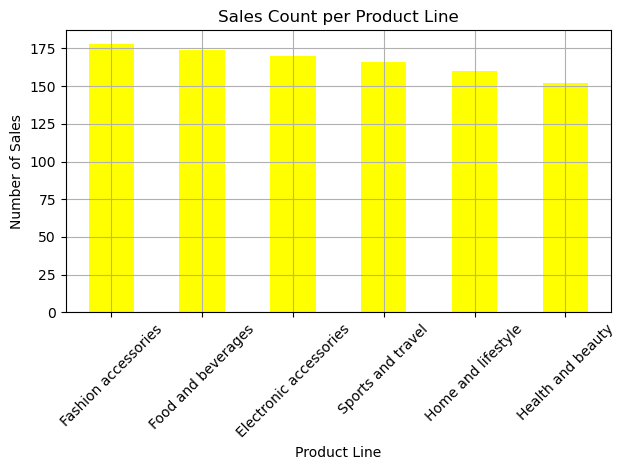

In [8]:
df["Product line"].value_counts().plot(kind='bar',color="Yellow")
plt.xlabel("Product Line")
plt.ylabel("Number of Sales")
plt.title("Sales Count per Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()



In [9]:
g=df.groupby("City")
g

In [10]:
for city,City_df in g:
    print(city)
    print(City_df)

Mandalay
            Branch      City Customer type  Gender            Product line  \
Invoice ID                                                                   
692-92-5582      B  Mandalay        Member  Female      Food and beverages   
351-62-0822      B  Mandalay        Member  Female     Fashion accessories   
529-56-3974      B  Mandalay        Member    Male  Electronic accessories   
299-46-1805      B  Mandalay        Member  Female       Sports and travel   
319-50-3348      B  Mandalay        Normal  Female      Home and lifestyle   
...            ...       ...           ...     ...                     ...   
552-44-5977      B  Mandalay        Member    Male       Health and beauty   
430-53-4718      B  Mandalay        Member    Male       Health and beauty   
602-16-6955      B  Mandalay        Normal  Female       Sports and travel   
690-01-6631      B  Mandalay        Normal    Male     Fashion accessories   
303-96-2227      B  Mandalay        Normal  Female     

In [11]:
g.max()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,,,,,,,,
Mandalay,B,Normal,Male,Sports and travel,99.96,10,48.69,1022.49,3/9/2019,20:57,Ewallet,973.8,4.761905,48.69,10.0
Naypyitaw,C,Normal,Male,Sports and travel,99.96,10,49.65,1042.65,3/9/2019,20:59,Ewallet,993.0,4.761905,49.65,10.0
Yangon,A,Normal,Male,Sports and travel,99.83,10,49.49,1039.29,3/9/2019,20:59,Ewallet,989.8,4.761905,49.49,10.0


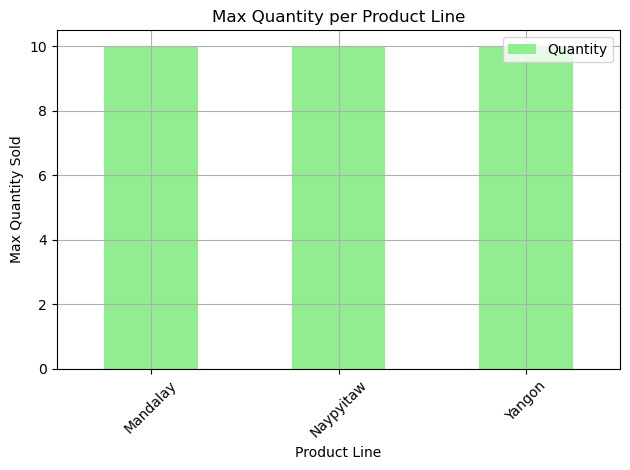

In [12]:
g["Quantity"].max().plot(kind='bar',color="lightgreen")
plt.xlabel("Product Line")
plt.ylabel("Max Quantity Sold")
plt.title("Max Quantity per Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()


In [13]:
g.min()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,,,,,,,,
Mandalay,B,Member,Female,Electronic accessories,10.59,1,0.8875,18.6375,1/1/2019,10:01,Cash,17.75,4.761905,0.8875,4.0
Naypyitaw,C,Member,Female,Electronic accessories,10.16,1,0.5085,10.6785,1/1/2019,10:00,Cash,10.17,4.761905,0.5085,4.0
Yangon,A,Member,Female,Electronic accessories,10.08,1,0.6045,12.6945,1/1/2019,10:00,Cash,12.09,4.761905,0.6045,4.0


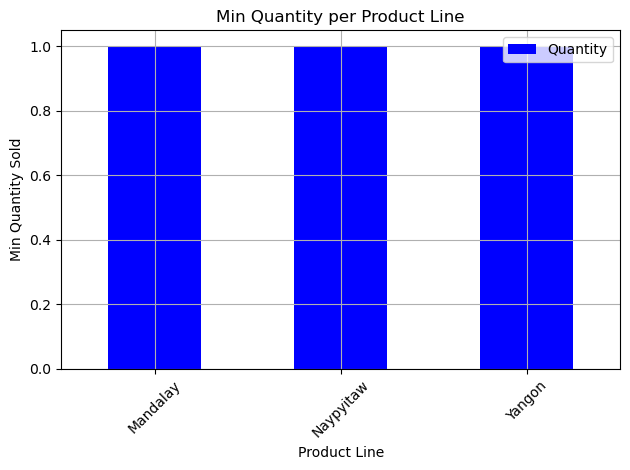

In [14]:
g["Quantity"].min().plot(kind='bar',color="blue")
plt.xlabel("Product Line")
plt.ylabel("Min Quantity Sold")
plt.title("Min Quantity per Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

In [15]:
df["Gender"].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

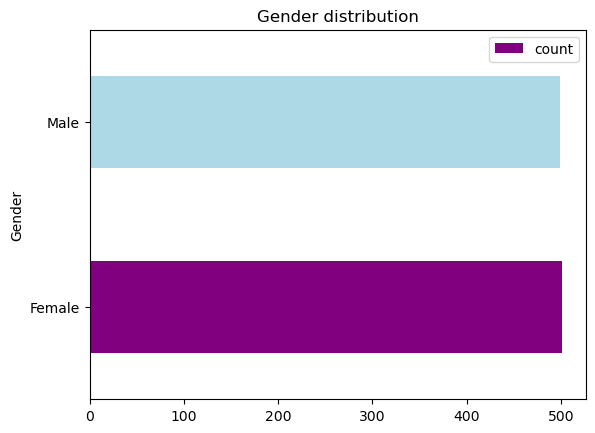

In [16]:
df["Gender"].value_counts().plot.barh(color=["purple","lightblue"],label="count",)
plt.title("Gender distribution")
plt.legend()

In [17]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [18]:
df["Date"] = pd.to_datetime(df["Date"])
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


In [19]:
df.rename(columns={"cogs": "cost"}, inplace=True)
df.rename(columns={"Total": "total"},inplace=True)
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [20]:
df.groupby("Product line")["Unit price"].sum()

Product line
Electronic accessories     9103.77
Fashion accessories       10173.35
Food and beverages         9745.54
Health and beauty          8337.88
Home and lifestyle         8850.71
Sports and travel          9460.88
Name: Unit price, dtype: float64

Text(0.5, 1.0, 'Total price of product')

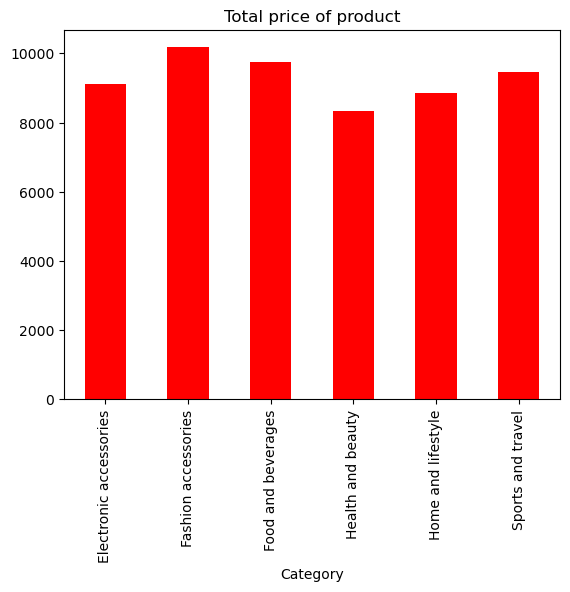

In [21]:
df.groupby("Product line")["Unit price"].sum().plot.bar(color="r")
plt.xlabel("Category")
plt.title("Total price of product")

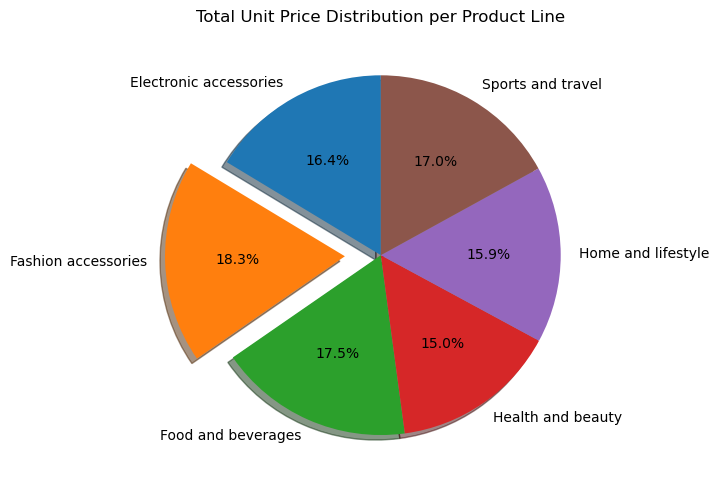

In [ ]:
df.groupby("Product line")["Unit price"].sum().plot(
    kind='pie',
    autopct='%1.1f%%',       # shows percentage
    startangle=90,           # starts at 90 degrees
    shadow=True,             # adds shadow effect
    figsize=(8, 5), 
    explode=[0,0.2,0,0,0,0] 
                 # makes it bigger
)

plt.title("Total Unit Price Distribution per Product Line")
plt.tight_layout()
plt.show()


In [23]:
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [24]:
df.pivot_table(index="Date",columns="City",aggfunc=sum)

C:\Users\mahad aziz\AppData\Local\Temp\ipykernel_4300\451870243.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(index="Date",columns="City",aggfunc=sum)


Tax 5%                          Total                         \
City       Mandalay Naypyitaw    Yangon   Mandalay  Naypyitaw     Yangon   
Date                                                                       
2019-01-01  73.1760   39.8650  112.9200  1536.6960   837.1650  2371.3200   
2019-01-02  55.3715   22.6500   14.6215  1162.8015   475.6500   307.0515   
2019-01-03  48.4140    5.9060   44.6385  1016.6940   124.0260   937.4085   
2019-01-04  24.3135   29.9925   23.0125   510.5835   629.8425   483.2625   
2019-01-05  23.1790   48.8295   96.4050   486.7590  1025.4195  2024.5050   
...             ...       ...       ...        ...        ...        ...   
2019-03-26  14.3430   22.5700   56.5400   301.2030   473.9700  1187.3400   
2019-03-27  42.8045   44.9190   50.5060   898.8945   943.2990  1060.6260   
2019-03-28   4.5555   22.8955   78.7110    95.6655   480.8055  1652.9310   
2019-03-29  98.0920   46.9380   46.5530  2059.9320   985.6980   977.6130   
2019-03-30  82.1170   68.6660   62.8865  1724.4570  1441.9860  1320.6165   

             Branch                               Customer type  ...  \
City       Mandalay Naypyitaw  Yangon                  Mandalay  ...   
Date                                                             ...   
2019-01-01      BBB      CCCC   AAAAA        NormalNormalMember  ...   
2019-01-02     BBBB        CC      AA  NormalMemberNormalNormal  ...   
2019-01-03      BBB        CC     AAA        NormalNormalMember  ...   
2019-01-04      BBB         C      AA        MemberNormalMember  ...   
2019-01-05      BBB      CCCC   AAAAA        MemberMemberNormal  ...   
...             ...       ...     ...                       ...  ...   
2019-03-26      BBB      CCCC  AAAAAA        MemberNormalMember  ...   
2019-03-27     BBBB         C   AAAAA  NormalMemberNormalMember  ...   
2019-03-28        B       CCC  AAAAAA                    Normal  ...   
2019-03-29     BBBB        CC      AA  NormalMemberMemberNormal  ...   
2019-03-30      BBB      CCCC    AAAA        MemberMemberMember  ...   

           Unit price     cost                    gross income            \
City           Yangon Mandalay Naypyitaw   Yangon     Mandalay Naypyitaw   
Date                                                                       
2019-01-01     287.20  1463.52    797.30  2258.40      73.1760   39.8650   
2019-01-02      84.13  1107.43    453.00   292.43      55.3715   22.6500   
2019-01-03     160.13   968.28    118.12   892.77      48.4140    5.9060   
2019-01-04      56.51   486.27    599.85   460.25      24.3135   29.9925   
2019-01-05     344.87   463.58    976.59  1928.10      23.1790   48.8295   
...               ...      ...       ...      ...          ...       ...   
2019-03-26     268.55   286.86    451.40  1130.80      14.3430   22.5700   
2019-03-27     258.06   856.09    898.38  1010.12      42.8045   44.9190   
2019-03-28     288.84    91.11    457.91  1574.22       4.5555   22.8955   
2019-03-29     143.80  1961.84    938.76   931.06      98.0920   46.9380   
2019-03-30     228.57  1642.34   1373.32  1257.73      82.1170   68.6660   

                     gross margin percentage                        
City          Yangon                Mandalay  Naypyitaw     Yangon  
Date                                                                
2019-01-01  112.9200               14.285714  19.047619  23.809524  
2019-01-02   14.6215               19.047619   9.523810   9.523810  
2019-01-03   44.6385               14.285714   9.523810  14.285714  
2019-01-04   23.0125               14.285714   4.761905   9.523810  
2019-01-05   96.4050               14.285714  19.047619  23.809524  
...              ...                     ...        ...        ...  
2019-03-26   56.5400               14.285714  19.047619  28.571429  
2019-03-27   50.5060               19.047619   4.761905  23.809524  
2019-03-28   78.7110                4.761905  14.285714  28.571429  
2019-03-29   46.5530               19.047619 

In [25]:
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [26]:
df["Payment"].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

Text(0.5, 1.0, 'Payment method distrubtion')

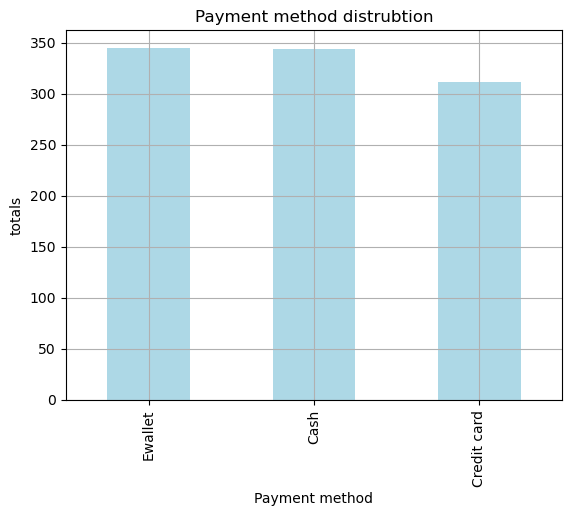

In [27]:
df["Payment"].value_counts().plot.bar(color="lightblue")
plt.grid()
plt.xlabel("Payment method")
plt.ylabel("totals")
plt.title("Payment method distrubtion")

In [28]:
df.columns = df.columns.str.strip()
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [29]:
sales_by_date = df.groupby("Date")["Total"].max() # Tell total sale
sales_by_date


Date
2019-01-01    888.6150
2019-01-02    383.7645
2019-01-03    520.8000
2019-01-04    629.8425
2019-01-05    690.0180
                ...   
2019-03-26    530.6700
2019-03-27    943.2990
2019-03-28    525.2310
2019-03-29    922.6350
2019-03-30    918.7290
Name: Total, Length: 89, dtype: float64

In [30]:
df.groupby("Date")["Total"].sum()
   # Yani ke ek tareekh ke jitne bhi records hain unki total sales ek line mein jama kar di jaayegi.

Date
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
                ...    
2019-03-26    1962.5130
2019-03-27    2902.8195
2019-03-28    2229.4020
2019-03-29    4023.2430
2019-03-30    4487.0595
Name: Total, Length: 89, dtype: float64

In [31]:
top_sales_date = sales_by_date[sales_by_date == sales_by_date.max()].index[0]
top_sales_value = sales_by_date.max()

print(f"📅 Highest sales happened on: {top_sales_date}") # highest sale date 
print(f"💰 Total sales on that day: {top_sales_value:}")



📅 Highest sales happened on: 2019-02-15 00:00:00
💰 Total sales on that day: 1042.65


C:\Users\mahad aziz\AppData\Local\Temp\ipykernel_4300\1810003208.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\mahad aziz\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


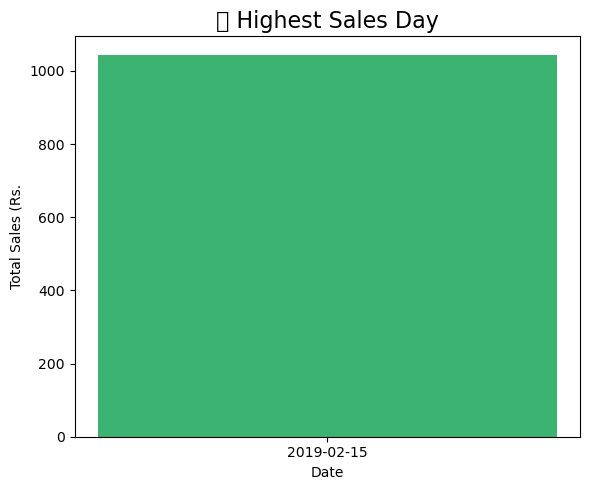

In [32]:
import matplotlib.pyplot as plt

# Agar top_sales_date ek datetime object hai, use string mein convert karo
date_label = top_sales_date.strftime('%Y-%m-%d')

# Plot
plt.figure(figsize=(6, 5))
plt.bar(date_label, top_sales_value, color='mediumseagreen')

# Titles and labels
plt.title('📈 Highest Sales Day', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales (Rs.')

# Neat layout
plt.tight_layout()
plt.show()


In [33]:
# Group by city and sum the sales
sales_by_city = df.groupby('City')['Total'].sum()

# Find the city with the highest sales
top_sales_city = sales_by_city.idxmax()
top_sales_value = sales_by_city.max()

# Print the result
print(f"🌆 City with highest sales: {top_sales_city}")
print(f"💰 Total sales in {top_sales_city}: {top_sales_value}")

🌆 City with highest sales: Naypyitaw
💰 Total sales in Naypyitaw: 110568.7065


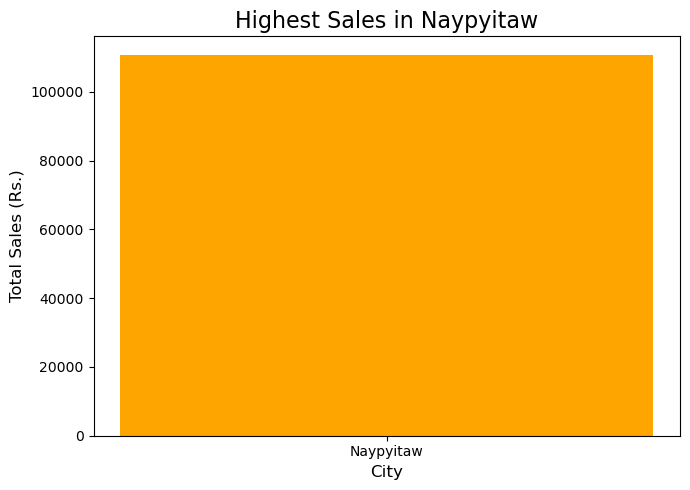

In [34]:
import matplotlib.pyplot as plt

# Plot bar for top city sales
plt.figure(figsize=(7, 5))

# Bar chart showing sales for the city with highest sales
plt.bar(top_sales_city, top_sales_value, color='orange')

# Add title and labels
plt.title(f'Highest Sales in {top_sales_city}', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales (Rs.)', fontsize=12)

# Display the value on top of the bar

# Neat layout
plt.tight_layout()
plt.show()


In [35]:
df.to_csv("updated_file.csv", index=False)